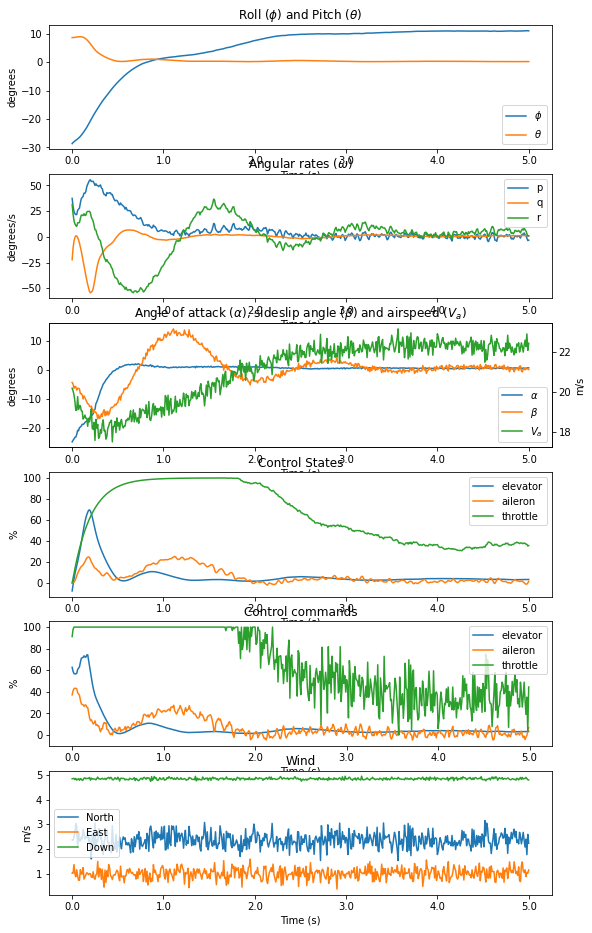

In [1]:
from pyfly.pyfly import PyFly
from pyfly.pid_controller import PIDController
import numpy as np

# TODO: an deinen Pfad anpassen 
sim = PyFly("/home/user/anaconda3/lib/python3.8/site-packages/pyfly/pyfly_config.json", "/home/user/anaconda3/lib/python3.8/site-packages/pyfly/x8_param.mat")
sim.seed(0)

sim.reset(state={"roll": -0.5, "pitch": 0.15})

pid = PIDController(sim.dt)
pid.set_reference(phi=0.2, theta=0, va=22)

for step_i in range(500):
    phi = sim.state["roll"].value
    theta = sim.state["pitch"].value
    Va = sim.state["Va"].value
    omega = [sim.state["omega_p"].value, sim.state["omega_q"].value, sim.state["omega_r"].value]

    action = pid.get_action(phi, theta, Va, omega)
    success, step_info = sim.step(action)

    if not success:
        break

sim.render(block=True)